In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer, precision_score,recall_score, confusion_matrix, classification_report
import itertools
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import StratifiedKFold
#import seaborn as sns
import matplotlib.pyplot as plt
import ast
import random
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
breastCancer = load_breast_cancer()
print(breastCancer.data.shape)
df = pd.DataFrame(data = breastCancer.data, columns = breastCancer.feature_names)
df['target'] = breastCancer.target
df.columns = df.columns.str.replace(' ', '_')
df.head()

<ipython-input-2-41921edc4e85>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


(569, 30)


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

# 1 = malignant
# 0 = benign

In [4]:
df['target'] = df.target.apply(lambda x: min(x, 1))

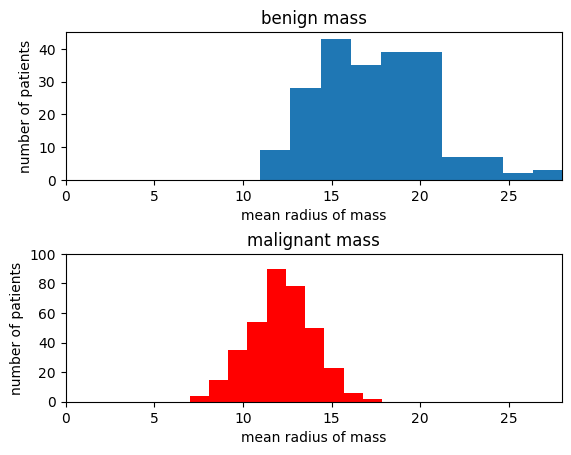

In [5]:
fig, (ax1,ax2) = plt.subplots(2,1)
fig.subplots_adjust(hspace=0.5)

ax1.hist(df[df.target==0].mean_radius);
ax1.set_ylabel('number of patients');
ax1.set_xlabel('mean radius of mass');
ax2.set_ylim(0, 100);
ax1.set_xlim(0,28);
ax1.set_title('benign mass');

ax2.hist(df[df.target==1].mean_radius, color='red');
ax2.set_ylabel('number of patients');
ax2.set_xlabel('mean radius of mass');
ax2.set_ylim(0, 100);
ax2.set_xlim(0,28);
ax2.set_title('malignant mass');


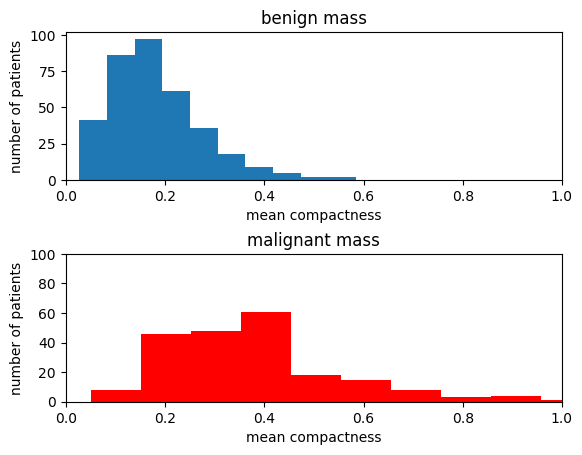

In [6]:
fig, (ax1,ax2) = plt.subplots(2,1)
fig.subplots_adjust(hspace=0.5)

ax1.hist(df[df.target==1].worst_compactness);
ax1.set_ylabel('number of patients');
ax1.set_xlabel('mean compactness');
ax1.set_xlim(0, 1.0);
ax2.set_ylim(0, 100);
ax1.set_title('benign mass');

ax2.hist(df[df.target==0].worst_compactness, color='red');
ax2.set_ylabel('number of patients');
ax2.set_xlabel('mean compactness');
ax2.set_xlim(0, 1.0);
ax2.set_ylim(0, 100);
ax2.set_title('malignant mass');


In [7]:
nn = NearestNeighbors(n_neighbors=8, metric='euclidean', algorithm='auto')
#2-D array of patient 
X = [[x] for x in df.mean_radius]
fit =nn.fit(X)

#knn
distances, indices = fit.kneighbors([[6]])
display(indices[0])

#neighbors of radius 
nbrs = df.iloc[indices[0]]
display(nbrs)

good = nbrs[nbrs.target == 0].count().target
bad = nbrs[nbrs.target == 1].count().target
print('benign: {}\nmalignant: {}'.format(good, bad))


array([101, 539, 538, 568,  46, 151, 525, 314], dtype=int32)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.000000,0.1930,0.07818,...,19.54,50.41,185.2,0.15840,0.12020,0.0000,0.00000,0.2932,0.09382,1
539,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.013640,0.2037,0.07751,...,31.89,54.49,223.6,0.15960,0.30640,0.3393,0.05000,0.2790,0.10660,1
538,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.000000,0.1870,0.07285,...,30.92,57.17,248.0,0.12560,0.08340,0.0000,0.00000,0.3058,0.09938,1
568,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.000000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.0688,0.02564,0.3105,0.07409,1
151,8.219,20.70,53.27,203.9,0.09405,0.13050,0.13210,0.021680,0.2222,0.08261,...,29.72,58.08,249.8,0.16300,0.43100,0.5381,0.07879,0.3322,0.14860,1
525,8.571,13.10,54.53,221.3,0.10360,0.07632,0.02565,0.015100,0.1678,0.07126,...,18.45,63.30,275.6,0.16410,0.22350,0.1754,0.08512,0.2983,0.10490,1
314,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.000000,0.2163,0.07359,...,22.44,56.65,240.1,0.13470,0.07767,0.0000,0.00000,0.3142,0.08116,1


benign: 0
malignant: 8


# clearly the size of the mass matters. 
#Is a smaller mas denser? 

In [8]:
# df[['age', 'trestbps']].values
X = df[['mean_radius', 'mean_compactness']].values
y = df[['target']].values

# This builds an index data structure under the hood for query performance
fit = nn.fit(X)

# Get a random patient to test on
i = random.randint(0,len(X)-1)
massX = X[i]
massY = y[i]
display(df.iloc[i])

 # Find the k nearest neighbors to the patient. Problem: the patient
# itself will be found in the list of neighbors!
distances, indices = fit.kneighbors([massX])
nbrs = df.iloc[indices[0]]
display(nbrs)

good = nbrs[nbrs.target == 0].count().target
bad = nbrs[nbrs.target == 1].count().target
print('benign: {}\nmalignant: {}'.format(good, bad))
predict = 0 if (good > bad) else 1
actual = 0 if (massY == 0) else 1
success = predict == actual
print(success)

mean_radius                  15.660000
mean_texture                 23.200000
mean_perimeter              110.200000
mean_area                   773.500000
mean_smoothness               0.110900
mean_compactness              0.311400
mean_concavity                0.317600
mean_concave_points           0.137700
mean_symmetry                 0.249500
mean_fractal_dimension        0.081040
radius_error                  1.292000
texture_error                 2.454000
perimeter_error              10.120000
area_error                  138.500000
smoothness_error              0.012360
compactness_error             0.059950
concavity_error               0.082320
concave_points_error          0.030240
symmetry_error                0.023370
fractal_dimension_error       0.006042
worst_radius                 19.850000
worst_texture                31.640000
worst_perimeter             143.700000
worst_area                 1226.000000
worst_smoothness              0.150400
worst_compactness        

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
258,15.66,23.20,110.2,773.5,0.1109,0.3114,0.31760,0.13770,0.2495,0.08104,...,31.64,143.7,1226.0,0.1504,0.5172,0.6181,0.2462,0.3277,0.10190,0
351,15.75,19.22,107.1,758.6,0.1243,0.2364,0.29140,0.12420,0.2375,0.07603,...,24.17,119.4,915.3,0.1550,0.5046,0.6872,0.2135,0.4245,0.10500,0
118,15.78,22.91,105.7,782.6,0.1155,0.1752,0.21330,0.09479,0.2096,0.07331,...,30.50,130.3,1272.0,0.1855,0.4925,0.7356,0.2034,0.3274,0.12520,0
484,15.73,11.28,102.8,747.2,0.1043,0.1299,0.11910,0.06211,0.1784,0.06259,...,14.20,112.5,854.3,0.1541,0.2979,0.4004,0.1452,0.2557,0.08181,1
259,15.53,33.56,103.7,744.9,0.1063,0.1639,0.17510,0.08399,0.2091,0.06650,...,49.54,126.3,1035.0,0.1883,0.5564,0.5703,0.2014,0.3512,0.12040,0
223,15.75,20.25,102.6,761.3,0.1025,0.1204,0.11470,0.06462,0.1935,0.06303,...,30.29,125.9,1088.0,0.1552,0.4480,0.3976,0.1479,0.3993,0.10640,0
11,15.78,17.89,103.6,781.0,0.0971,0.1292,0.09954,0.06606,0.1842,0.06082,...,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.1810,0.3792,0.10480,0
417,15.50,21.08,102.9,803.1,0.1120,0.1571,0.15220,0.08481,0.2085,0.06864,...,27.65,157.1,1748.0,0.1517,0.4002,0.4211,0.2134,0.3003,0.10480,0


benign: 7
malignant: 1
True


In [9]:
X = df[['mean_radius', 'mean_compactness']].values
y = df[['target']].values

# This builds an index data structure under the hood for query performance
fit = nn.fit(X)

# Get random patients to test on
n = 7
pindices = [random.randint(0,len(X)-1) for _ in range(n)]
massX = X[pindices]
massY = y[pindices]

distances, indices = fit.kneighbors(massX)
print('indices of k-nearest neighbors for each patient:')
display(indices)

for i in range(n):
    print('nearest neighbors to patient: {}:'.format(massX[i]))
    nbrs = df.iloc[indices[i]]
    display(nbrs)

indices of k-nearest neighbors for each patient:


array([[132, 375,  34, 406, 141,  17, 283, 329],
       [131, 172, 392, 417, 509, 259,  91,  22],
       [197, 444, 492, 408, 119,  77, 317, 274],
       [482, 526,  39,  93, 396,  49,  76,  40],
       [411, 381, 342, 507, 398, 173, 440, 534],
       [292, 402, 403, 331, 336, 195, 150, 143],
       [229, 518, 247,  79, 397, 322, 475, 407]], dtype=int32)

nearest neighbors to patient: [16.16    0.1284]:


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
132,16.16,21.54,106.2,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,31.68,129.7,1175.0,0.1395,0.3055,0.2992,0.1312,0.3480,0.07619,0
375,16.17,16.07,106.3,788.5,0.09880,0.14380,0.06651,0.05397,0.1990,0.06572,...,19.14,113.1,861.5,0.1235,0.2550,0.2114,0.1251,0.3153,0.08960,1
34,16.13,17.88,107.0,807.2,0.10400,0.15590,0.13540,0.07752,0.1998,0.06515,...,27.26,132.7,1261.0,0.1446,0.5804,0.5274,0.1864,0.4270,0.12330,0
406,16.14,14.86,104.3,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,19.58,115.9,947.9,0.1206,0.1722,0.2310,0.1129,0.2778,0.07012,1
141,16.11,18.05,105.1,813.0,0.09721,0.11370,0.09447,0.05943,0.1861,0.06248,...,25.27,129.0,1233.0,0.1314,0.2236,0.2802,0.1216,0.2792,0.08158,0
17,16.13,20.68,108.1,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,...,31.48,136.8,1315.0,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420,0
283,16.24,18.77,108.8,805.1,0.10660,0.18020,0.19480,0.09052,0.1876,0.06684,...,25.09,126.9,1031.0,0.1365,0.4706,0.5026,0.1732,0.2770,0.10630,0
329,16.26,21.88,107.5,826.8,0.11650,0.12830,0.17990,0.07981,0.1869,0.06532,...,25.21,113.7,975.2,0.1426,0.2116,0.3344,0.1047,0.2736,0.07953,0


nearest neighbors to patient: [15.46    0.1223]:


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
131,15.46,19.48,101.7,748.9,0.1092,0.1223,0.1466,0.08087,0.1931,0.05796,...,26.00,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019,0
172,15.46,11.89,102.5,736.9,0.1257,0.1555,0.2032,0.10970,0.1966,0.07069,...,17.04,125.0,1102.0,0.1531,0.3583,0.5830,0.1827,0.3216,0.10100,0
392,15.49,19.97,102.4,744.7,0.1160,0.1562,0.1891,0.09113,0.1929,0.06744,...,29.41,142.1,1359.0,0.1681,0.3913,0.5553,0.2121,0.3187,0.10190,0
417,15.50,21.08,102.9,803.1,0.1120,0.1571,0.1522,0.08481,0.2085,0.06864,...,27.65,157.1,1748.0,0.1517,0.4002,0.4211,0.2134,0.3003,0.10480,0
509,15.46,23.95,103.8,731.3,0.1183,0.1870,0.2030,0.08520,0.1807,0.07083,...,36.33,117.7,909.4,0.1732,0.4967,0.5911,0.2163,0.3013,0.10670,0
259,15.53,33.56,103.7,744.9,0.1063,0.1639,0.1751,0.08399,0.2091,0.06650,...,49.54,126.3,1035.0,0.1883,0.5564,0.5703,0.2014,0.3512,0.12040,0
91,15.37,22.76,100.2,728.2,0.0920,0.1036,0.1122,0.07483,0.1717,0.06097,...,25.84,107.5,830.9,0.1257,0.1997,0.2846,0.1476,0.2556,0.06828,0
22,15.34,14.26,102.5,704.4,0.1073,0.2135,0.2077,0.09756,0.2521,0.07032,...,19.08,125.1,980.9,0.1390,0.5954,0.6305,0.2393,0.4667,0.09946,0


nearest neighbors to patient: [18.08     0.08642]:


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
197,18.08,21.84,117.4,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,24.70,129.1,1228.0,0.08822,0.1963,0.2535,0.09181,0.2369,0.06558,0
444,18.03,16.85,117.5,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,22.02,133.3,1292.0,0.12630,0.2666,0.4290,0.15350,0.2842,0.08225,0
492,18.01,20.56,118.4,1007.0,0.10010,0.12890,0.11700,0.07762,0.2116,0.06077,...,26.06,143.4,1426.0,0.13090,0.2327,0.2544,0.14890,0.3251,0.07625,0
408,17.99,20.66,117.8,991.7,0.10360,0.13040,0.12010,0.08824,0.1992,0.06069,...,25.41,138.1,1349.0,0.14820,0.3735,0.3301,0.19740,0.3060,0.08503,0
119,17.95,20.01,114.2,982.0,0.08402,0.06722,0.07293,0.05596,0.2129,0.05025,...,27.83,129.2,1261.0,0.10720,0.1202,0.2249,0.11850,0.4882,0.06111,0
77,18.05,16.15,120.2,1006.0,0.10650,0.21460,0.16840,0.10800,0.2152,0.06673,...,18.91,150.1,1610.0,0.14780,0.5634,0.3786,0.21020,0.3751,0.11080,0
317,18.22,18.87,118.7,1027.0,0.09746,0.11170,0.11300,0.07950,0.1807,0.05664,...,25.00,140.9,1485.0,0.14340,0.2763,0.3853,0.17760,0.2812,0.08198,0
274,17.93,24.48,115.2,998.9,0.08855,0.07027,0.05699,0.04744,0.1538,0.05510,...,34.69,135.1,1320.0,0.13150,0.1806,0.2080,0.11360,0.2504,0.07948,0


nearest neighbors to patient: [13.47    0.1155]:


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
482,13.47,14.06,87.32,546.3,0.10710,0.11550,0.05786,0.05266,0.1779,0.06639,...,18.32,94.94,660.2,0.1393,0.2499,0.18480,0.13350,0.3227,0.09326,1
526,13.46,18.75,87.44,551.1,0.10750,0.11380,0.04201,0.03152,0.1723,0.06317,...,25.16,101.90,719.8,0.1624,0.3124,0.26540,0.14270,0.3518,0.08665,1
39,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,0.1720,0.06419,...,26.02,107.30,740.4,0.1610,0.4225,0.50300,0.22580,0.2807,0.10710,0
93,13.45,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,0.1638,0.05710,...,25.94,97.59,699.4,0.1339,0.1751,0.13810,0.07911,0.2678,0.06603,1
396,13.51,18.89,88.10,558.1,0.10590,0.11470,0.08580,0.05381,0.1806,0.06079,...,27.20,97.33,675.2,0.1428,0.2570,0.34380,0.14530,0.2666,0.07686,1
49,13.49,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,0.1809,0.05718,...,31.82,99.00,698.8,0.1162,0.1711,0.22820,0.12820,0.2871,0.06917,1
76,13.53,10.94,87.91,559.2,0.12910,0.10470,0.06877,0.06556,0.2403,0.06641,...,12.49,91.36,605.5,0.1451,0.1379,0.08539,0.07407,0.2710,0.07191,1
40,13.44,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,0.05587,...,30.25,102.50,787.9,0.1094,0.2043,0.20850,0.11120,0.2994,0.07146,0


nearest neighbors to patient: [11.04     0.07804]:


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
411,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.024800,0.1714,0.06340,...,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881,1
381,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.020740,0.2003,0.06246,...,20.83,79.73,447.1,0.1095,0.1982,0.15530,0.06754,0.3202,0.07287,1
342,11.06,14.96,71.49,373.9,0.10330,0.09097,0.05397,0.033410,0.1776,0.06907,...,19.90,79.76,440.0,0.1418,0.2210,0.22990,0.10750,0.3301,0.09080,1
507,11.06,17.12,71.25,366.5,0.11940,0.10710,0.04063,0.042680,0.1954,0.07976,...,20.74,76.08,411.1,0.1662,0.2031,0.12560,0.09514,0.2780,0.11680,1
398,11.06,14.83,70.31,378.2,0.07741,0.04768,0.02712,0.007246,0.1535,0.06214,...,20.35,80.79,496.7,0.1120,0.1879,0.20790,0.05556,0.2590,0.09158,1
173,11.08,14.71,70.21,372.7,0.10060,0.05743,0.02363,0.025830,0.1566,0.06669,...,16.82,72.01,396.5,0.1216,0.0824,0.03938,0.04306,0.1902,0.07313,1
440,10.97,17.20,71.73,371.5,0.08915,0.11130,0.09457,0.036130,0.1489,0.06640,...,26.87,90.14,476.4,0.1391,0.4082,0.47790,0.15550,0.2540,0.09532,1
534,10.96,17.62,70.79,365.6,0.09687,0.09752,0.05263,0.027880,0.1619,0.06408,...,26.51,76.43,407.5,0.1428,0.2510,0.21230,0.09861,0.2289,0.08278,1


nearest neighbors to patient: [12.95     0.07943]:


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,19.93,88.81,585.4,0.14830,0.2068,0.22410,0.10560,0.3380,0.09584,1
402,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,0.05899,...,24.61,96.31,621.9,0.09329,0.2318,0.16040,0.06608,0.3207,0.07247,1
403,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,0.06200,...,23.02,89.69,580.9,0.11720,0.1958,0.18100,0.08388,0.3297,0.07834,1
331,12.98,19.35,84.52,514.0,0.09579,0.11250,0.07107,0.02950,0.1761,0.06540,...,21.95,99.21,634.3,0.12880,0.3253,0.34390,0.09858,0.3596,0.09166,1
336,12.99,14.23,84.08,514.3,0.09462,0.09965,0.03738,0.02098,0.1652,0.07238,...,16.91,87.38,576.0,0.11420,0.1975,0.14500,0.05850,0.2432,0.10090,1
195,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,22.00,90.81,600.6,0.10970,0.1506,0.17640,0.08235,0.3024,0.06949,1
150,13.00,20.78,83.51,519.4,0.11350,0.07589,0.03136,0.02645,0.2540,0.06087,...,24.11,90.82,616.7,0.12970,0.1105,0.08112,0.06296,0.3196,0.06435,1
143,12.90,15.92,83.74,512.2,0.08677,0.09509,0.04894,0.03088,0.1778,0.06235,...,21.82,97.17,643.8,0.13120,0.2548,0.20900,0.10120,0.3549,0.08118,1


nearest neighbors to patient: [12.83    0.1799]:


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
229,12.83,22.33,85.26,503.2,0.10880,0.17990,0.16950,0.06861,0.2123,0.07254,...,30.15,105.30,706.0,0.17770,0.5343,0.6282,0.19770,0.3407,0.12430,0
518,12.88,18.22,84.45,493.1,0.12180,0.16610,0.04825,0.05303,0.1709,0.07253,...,24.37,99.31,674.7,0.14560,0.2961,0.1246,0.10960,0.2582,0.08893,1
247,12.89,14.11,84.95,512.2,0.08760,0.13460,0.13740,0.03980,0.1596,0.06409,...,17.70,105.00,639.1,0.12540,0.5849,0.7727,0.15610,0.2639,0.11780,1
79,12.86,18.00,83.19,506.3,0.09934,0.09546,0.03889,0.02315,0.1718,0.05997,...,24.82,91.88,622.1,0.12890,0.2141,0.1731,0.07926,0.2779,0.07918,1
397,12.80,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.04083,0.1574,0.05750,...,21.06,90.72,591.0,0.09534,0.1812,0.1901,0.08296,0.1988,0.07053,1
322,12.86,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,0.1543,0.06476,...,21.08,92.80,599.5,0.15470,0.2231,0.1791,0.11550,0.2382,0.08553,1
475,12.83,15.73,82.89,506.9,0.09040,0.08269,0.05835,0.03078,0.1705,0.05913,...,19.35,93.22,605.8,0.13260,0.2610,0.3476,0.09783,0.3006,0.07802,1
407,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,27.01,91.63,645.8,0.09402,0.1936,0.1838,0.05601,0.2488,0.08151,1


# Kneighbors model

In [23]:
class CustomKNeighbors(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.nn = NearestNeighbors(n_neighbors=self.n_neighbors)
        self.nn.fit(X)
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        distances, indices = self.nn.kneighbors(X)
        predictions = []
        for idx in indices:
            neighbor_labels = self.y_train[idx]
            predicted_value = np.median(neighbor_labels)  # Calculate the median
            
            # Adjust the prediction based on the median value
            if predicted_value == 0.5:
                predictions.append(1)  # If median is 0.5, predict 1
            else:
                predictions.append(predicted_value)  # Otherwise, use the median
        return np.array(predictions)



In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
custom_knn = CustomKNeighbors(n_neighbors=30)
custom_knn.fit(X_train_scaled,y_train)
y_pred=custom_knn.predict(X_test_scaled)

In [25]:
f1 = f1_score(y_test, y_pred, pos_label=1)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)


# Print the results
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

F1 Score: 0.9265
Precision: 0.8873
Recall: 0.9692


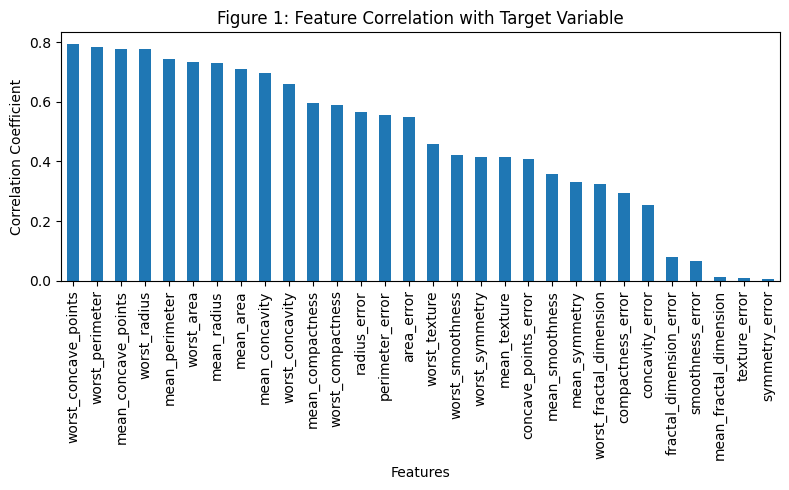

In [26]:
plt.figure(figsize=(8,5))
df.corr().target.apply(lambda x:abs(x)).sort_values(ascending =False).drop('target').plot(kind='bar')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')

plt.title('Figure 1: Feature Correlation with Target Variable')
plt.tight_layout()
plt.savefig('correlation.png',dpi=300)
